In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [2]:
def run_mandel(extent=(-2.0, 1.0, -1.5, 1.5), res=256, maxit=256):
    xs = np.linspace(extent[0], extent[1], res)   # x and y array
    ys = np.linspace(extent[2], extent[3], res)   # equally spaced
    
    escaped = np.zeros((res, res), np.float64)
    # loop ove region in complex plane
    for i in range(res):
        for j in range(res):
            c = xs[i] + 1j * ys[j] # build complex number
            escaped[i,j] = compute_mandel(c, maxit)
    
    return escaped / maxit # normalize for better plotting

In [3]:
def compute_mandel(c, maxit=256):
    z = 0.0j
    for it in range(1, maxit):
        z = z*z + c
        
        if abs(z) > 2.0:
            return it
        
    # if not escaped than return inf
    return np.inf

In [4]:
def plot_mandel(array):
    pp.figure(figsize = (6,6))
    cmap = matplotlib.cm.coolwarm
    cmap.set_bad('k')
    pp.imshow(array.T, cmap = cmap, norm = matplotlib.colors.PowerNorm(0.6),
             interpolation='none', origin='lower')

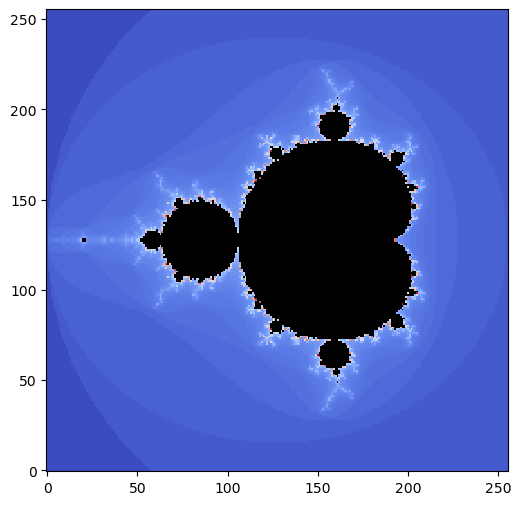

In [5]:
plot_mandel(run_mandel())

In [6]:
# command run the run_mandel many times and computes avg and stdev

%timeit run_mandel()

670 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# calculates the function calls using profiler

%prun -s cumulative run_mandel()

In [8]:
# line profiler will print every line

%load_ext line_profiler

%lprun -f compute_mandel run_mandel()

In [38]:
# this method does the same except it does vector math using c++ vector lib

def run_mandel_numpy(extent=(-2.0, 1.0, -1.5, 1.5), res=256, maxit=256):
    xs = np.linspace(extent[0], extent[1], res)   # x and y array
    ys = np.linspace(extent[2], extent[3], res)   # equally spaced
    
    # escape status of points; start them put at infinity
    escaped = np.full((res, res), np.inf, np.float64)
    
    c = xs[:,np.newaxis] + 1j * ys[np.newaxis,:]
    z = np.zeros_like(c, 'complex128')
    
    # loop ove region in complex plane
    for it in range(1, maxit):
        z = z * z + c
        
        escaped[(escaped == np.inf) & (np.abs(z) > 2.0)] = it
        
    return escaped / maxit # normalize for better plotting

In [39]:
np.seterr(over='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

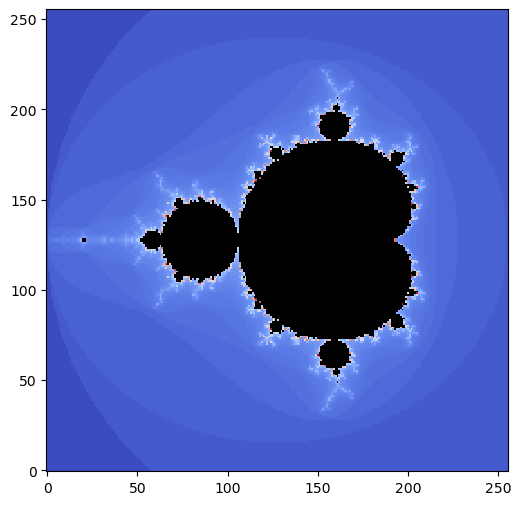

In [45]:
plot_mandel(run_mandel_numpy())

In [46]:
# command run the run_mandel many times and computes avg and stdev

%timeit run_mandel_numpy()

77.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
# calculates the function calls using profiler

%prun -s cumulative run_mandel_numpy()

In [49]:
%lprun -f compute_mandel run_mandel_numpy()

In [54]:
# numba just in time compiler decorator example
from numba import jit

In [57]:
def compute_mandel(c, maxit=256):
    z = 0.0j
    for it in range(1, maxit):
        z = z*z + c
        
        if abs(z) > 2.0:
            return it
        
    # if not escaped than return inf
    return np.inf

@jit
def run_mandel_numba(extent=(-2.0, 1.0, -1.5, 1.5), res=256, maxit=256):
    xs = np.linspace(extent[0], extent[1], res)   # x and y array
    ys = np.linspace(extent[2], extent[3], res)   # equally spaced
    
    escaped = np.zeros((res, res), np.float64)
    # loop ove region in complex plane
    for i in range(res):
        for j in range(res):
            c = xs[i] + 1j * ys[j] # build complex number
            escaped[i,j] = compute_mandel(c, maxit)
    
    return escaped / maxit # normalize for better plotting

@jit
def plot_mandel(array):
    pp.figure(figsize = (6,6))
    cmap = matplotlib.cm.coolwarm
    cmap.set_bad('k')
    pp.imshow(array.T, cmap = cmap, norm = matplotlib.colors.PowerNorm(0.6),
             interpolation='none', origin='lower')

/var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py:26: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


In [58]:
# command run the run_mandel many times and computes avg and stdev

%timeit run_mandel_numba()


/var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py:12: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "run_mandel_numba" failed type inference due to: Untyped global name 'compute_mandel': Cannot determine Numba type of <class 'function'>

File "../../../../var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py", line 22:
<source missing, REPL/exec in use?>

  @jit
/var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py:12: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "run_mandel_numba" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../var/folders/0n/5jntn3r574j80vp4g2qmy9tw0000gn/T/ipykernel_36690/2750504421.py", line 19:
<source missing, REPL/exec in use?>

  @jit
/Users/dmitriy/anaconda3/lib/python3.11/site-packages/numba/core/ob

592 ms ± 9.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
